# LOAD package

In [1]:
pwd

'/home/yunzheng/PAC/code/hsc_SEDfitting'

In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table,hstack
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
# cosmo = FlatLambdaCDM(100,0.268)

# READ files

In [3]:
table1 = Table.read("/home/kunxu/red_disk/deep_complete/HSC_deep_0_1.fits")
table2 = Table.read("/home/kunxu/red_disk/cigale_zheng/out/results.fits")

In [4]:
HSC_deep = hstack([table1,table2])

In [6]:
HSC_deep

object_id,object_id_isnull,ra,ra_isnull,dec,dec_isnull,g_cmodel_mag,g_cmodel_mag_isnull,g_cmodel_magsigma,g_cmodel_magsigma_isnull,r_cmodel_mag,r_cmodel_mag_isnull,r_cmodel_magsigma,r_cmodel_magsigma_isnull,i_cmodel_mag,i_cmodel_mag_isnull,i_cmodel_magsigma,i_cmodel_magsigma_isnull,z_cmodel_mag,z_cmodel_mag_isnull,z_cmodel_magsigma,z_cmodel_magsigma_isnull,y_cmodel_mag,y_cmodel_mag_isnull,y_cmodel_magsigma,y_cmodel_magsigma_isnull,a_g,a_g_isnull,a_r,a_r_isnull,a_i,a_i_isnull,a_z,a_z_isnull,a_y,a_y_isnull,photoz_best,photoz_best_isnull,photoz_std_best,photoz_std_best_isnull,skymap_id,skymap_id_isnull,z_extendedness_value,id,bayes.attenuation.E_BVs.stellar.old,bayes.attenuation.E_BVs.stellar.old_err,bayes.attenuation.E_BVs.stellar.young,bayes.attenuation.E_BVs.stellar.young_err,bayes.stellar.age_m_star,bayes.stellar.age_m_star_err,bayes.universe.redshift,bayes.universe.redshift_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.i,bayes.subaru.hsc.i_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,bayes.subaru.hsc.y,bayes.subaru.hsc.y_err,bayes.subaru.hsc.z,bayes.subaru.hsc.z_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(galex.NUV),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.i),best.param.restframe_Lnu(subaru.hsc.r),best.param.restframe_Lnu(subaru.hsc.y),best.param.restframe_Lnu(subaru.hsc.z),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.subaru.hsc.g,best.subaru.hsc.r,best.subaru.hsc.i,best.subaru.hsc.z,best.subaru.hsc.y
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,Myr,Myr,,,solMass,solMass,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy
int64,bool,float64,bool,float64,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,int32,bool,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

# 不同红移bin

## 0.2-0.4

In [5]:
zcut = (HSC_deep['photoz_best'] >= 0.2)&(HSC_deep['photoz_best']<=0.4)
HSC_deep_2_4 = HSC_deep[zcut]

In [8]:
HSC_deep_2_4    #311995

object_id,object_id_isnull,ra,ra_isnull,dec,dec_isnull,g_cmodel_mag,g_cmodel_mag_isnull,g_cmodel_magsigma,g_cmodel_magsigma_isnull,r_cmodel_mag,r_cmodel_mag_isnull,r_cmodel_magsigma,r_cmodel_magsigma_isnull,i_cmodel_mag,i_cmodel_mag_isnull,i_cmodel_magsigma,i_cmodel_magsigma_isnull,z_cmodel_mag,z_cmodel_mag_isnull,z_cmodel_magsigma,z_cmodel_magsigma_isnull,y_cmodel_mag,y_cmodel_mag_isnull,y_cmodel_magsigma,y_cmodel_magsigma_isnull,a_g,a_g_isnull,a_r,a_r_isnull,a_i,a_i_isnull,a_z,a_z_isnull,a_y,a_y_isnull,photoz_best,photoz_best_isnull,photoz_std_best,photoz_std_best_isnull,skymap_id,skymap_id_isnull,z_extendedness_value,id,bayes.attenuation.E_BVs.stellar.old,bayes.attenuation.E_BVs.stellar.old_err,bayes.attenuation.E_BVs.stellar.young,bayes.attenuation.E_BVs.stellar.young_err,bayes.stellar.age_m_star,bayes.stellar.age_m_star_err,bayes.universe.redshift,bayes.universe.redshift_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.i,bayes.subaru.hsc.i_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,bayes.subaru.hsc.y,bayes.subaru.hsc.y_err,bayes.subaru.hsc.z,bayes.subaru.hsc.z_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(galex.NUV),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.i),best.param.restframe_Lnu(subaru.hsc.r),best.param.restframe_Lnu(subaru.hsc.y),best.param.restframe_Lnu(subaru.hsc.z),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.subaru.hsc.g,best.subaru.hsc.r,best.subaru.hsc.i,best.subaru.hsc.z,best.subaru.hsc.y
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,Myr,Myr,,,solMass,solMass,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy
int64,bool,float64,bool,float64,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,int32,bool,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [9]:
print(np.max(HSC_deep_2_4['photoz_best']))
print(np.min(HSC_deep_2_4['photoz_best']))

0.4
0.2


### stellar mass cut & mag_z cut

In [6]:
HSC_deep_2_4_cut = HSC_deep_2_4[HSC_deep_2_4['bayes.stellar.m_star']>0.0]
print(len(HSC_deep_2_4_cut))

cut = np.isnan(HSC_deep_2_4_cut['i_cmodel_mag'])
HSC_deep_2_4_cut = HSC_deep_2_4_cut[~cut]
print(len(HSC_deep_2_4_cut))

cut = np.isinf(HSC_deep_2_4_cut['i_cmodel_mag'])
HSC_deep_2_4_final = HSC_deep_2_4_cut[~cut]
print(len(HSC_deep_2_4_final))

311979
311004
310999


In [7]:
mag_zband_2_4 = HSC_deep_2_4_final['i_cmodel_mag']
logmass_2_4 = np.log10(HSC_deep_2_4_final['bayes.stellar.m_star'])

In [8]:
limit = np.arange(8.0, 11.2, 0.1)
limit_bin = 0.5 * (limit[1:]+limit[:-1])
# print(limit)
index = np.digitize(logmass_2_4,limit)
zband_cut = np.zeros(32)
for i in range(len(limit) - 1):
    center_need = logmass_2_4[np.where(index == i+1)]
    zband_need = mag_zband_2_4[np.where(index == i+1)]
    zband_cut[i] = np.quantile(zband_need,0.95)

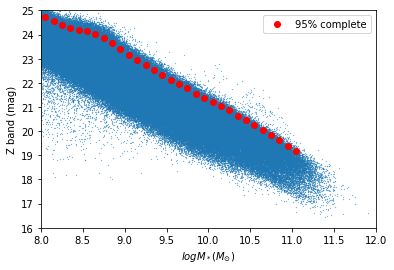

In [9]:
plt.scatter(logmass_2_4,mag_zband_2_4,s = 0.05)
# plt.plot(limit_bin,zband_cut[:-1],label = "95% complete")
plt.plot(limit_bin,zband_cut[:-1],"ro",label = "95% complete")
# plt.scatter(a[0],a[1],marker='*')
# plt.xscale("log")
plt.xlim(8,12)
plt.ylim(16,25)
plt.xlabel("$log M_*( M_{\odot})$")
plt.ylabel("Z band (mag)")
plt.legend()
# plt.grid()
# sns.set_style("ticks",{'axes.grid' : True})
# sns.set_style("darkgrid")

In [49]:
a = np.load("/home/yunzheng/PAC/code/PAC/0.2_0.4/mass_mag_limit.npy")

In [20]:
zband_cut = zband_cut[:-1]
np.save("./bayes_mass_mag_limit_2_4.npy",(limit_bin,zband_cut))

In [26]:
zband_cut

array([24.43140717, 24.28260689, 24.11602135, 23.99416018, 23.92563648,
       23.84773827, 23.72246647, 23.54987631, 23.34356422, 23.08657913,
       22.85016479, 22.62030354, 22.43862514, 22.21426544, 22.01190948,
       21.7883255 , 21.59155674, 21.43046741, 21.20083323, 21.02895546,
       20.85208054, 20.6677372 , 20.47901325, 20.2654789 , 20.09207878,
       19.86855202, 19.65558472, 19.44415207, 19.23171959, 19.00617104,
       18.80272198])

In [21]:
pwd

'/home/yunzheng/PAC/code/hsc_SEDfitting'

## 0.3_0.5

In [5]:
zcut = (HSC_deep['photoz_best'] >= 0.3)&(HSC_deep['photoz_best']<=0.5)
HSC_deep_3_5 = HSC_deep[zcut]

In [6]:
HSC_deep_3_5     #477989

object_id,object_id_isnull,ra,ra_isnull,dec,dec_isnull,g_cmodel_mag,g_cmodel_mag_isnull,g_cmodel_magsigma,g_cmodel_magsigma_isnull,r_cmodel_mag,r_cmodel_mag_isnull,r_cmodel_magsigma,r_cmodel_magsigma_isnull,i_cmodel_mag,i_cmodel_mag_isnull,i_cmodel_magsigma,i_cmodel_magsigma_isnull,z_cmodel_mag,z_cmodel_mag_isnull,z_cmodel_magsigma,z_cmodel_magsigma_isnull,y_cmodel_mag,y_cmodel_mag_isnull,y_cmodel_magsigma,y_cmodel_magsigma_isnull,a_g,a_g_isnull,a_r,a_r_isnull,a_i,a_i_isnull,a_z,a_z_isnull,a_y,a_y_isnull,photoz_best,photoz_best_isnull,photoz_std_best,photoz_std_best_isnull,skymap_id,skymap_id_isnull,z_extendedness_value,id,bayes.attenuation.E_BVs.stellar.old,bayes.attenuation.E_BVs.stellar.old_err,bayes.attenuation.E_BVs.stellar.young,bayes.attenuation.E_BVs.stellar.young_err,bayes.stellar.age_m_star,bayes.stellar.age_m_star_err,bayes.universe.redshift,bayes.universe.redshift_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.i,bayes.subaru.hsc.i_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,bayes.subaru.hsc.y,bayes.subaru.hsc.y_err,bayes.subaru.hsc.z,bayes.subaru.hsc.z_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(galex.NUV),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.i),best.param.restframe_Lnu(subaru.hsc.r),best.param.restframe_Lnu(subaru.hsc.y),best.param.restframe_Lnu(subaru.hsc.z),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.subaru.hsc.g,best.subaru.hsc.r,best.subaru.hsc.i,best.subaru.hsc.z,best.subaru.hsc.y
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,Myr,Myr,,,solMass,solMass,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy
int64,bool,float64,bool,float64,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,int32,bool,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [7]:
HSC_deep_3_5_cut = HSC_deep_3_5[HSC_deep_3_5['bayes.stellar.m_star']>0.0]
print(len(HSC_deep_3_5_cut))

cut = np.isnan(HSC_deep_3_5_cut['i_cmodel_mag'])
HSC_deep_3_5_cut = HSC_deep_3_5_cut[~cut]
print(len(HSC_deep_3_5_cut))

cut = np.isinf(HSC_deep_3_5_cut['i_cmodel_mag'])
HSC_deep_3_5_final = HSC_deep_3_5_cut[~cut]
print(len(HSC_deep_3_5_final))

477967
476448
476428


In [9]:
limit = np.arange(8.0, 11.2, 0.1)
limit_bin = 0.5 * (limit[1:]+limit[:-1])
mag_zband_3_5 = HSC_deep_3_5_final['i_cmodel_mag']
logmass_3_5 = np.log10(HSC_deep_3_5_final['bayes.stellar.m_star'])
index = np.digitize(logmass_3_5,limit)
zband_cut = np.zeros(32)
for i in range(len(limit) - 1):
    zband_need = mag_zband_3_5[np.where(index == i+1)]
    zband_cut[i] = np.quantile(zband_need,0.95)

In [34]:
zband_cut = zband_cut[:-1]
np.save("./bayes_mass_mag_limit_3_5.npy",(limit_bin,zband_cut))

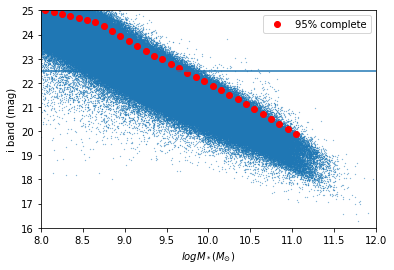

In [10]:
plt.scatter(logmass_3_5,mag_zband_3_5,s = 0.05)
# plt.plot(limit_bin,zband_cut[:-1],label = "95% complete")
plt.plot(limit_bin,zband_cut[:-1],"ro",label = "95% complete")
# plt.scatter(a[0],a[1],marker='*')
# plt.xscale("log")
plt.axhline(22.5)
plt.xlim(8,12)
plt.ylim(16,25)
plt.xlabel("$log M_*( M_{\odot})$")
plt.ylabel("i band (mag)")
plt.legend()
# plt.grid()
# sns.set_style("ticks",{'axes.grid' : True})
# sns.set_style("darkgrid")

In [30]:
a = np.load("/home/yunzheng/DPPAS/data/LOWZ/mass_mag_limit.npy")
a [1]

array([24.6913105 , 24.62381058, 24.57206211, 24.52176943, 24.44370575,
       24.35968037, 24.28428612, 24.15683746, 24.01900902, 23.85358715,
       23.6294735 , 23.41860008, 23.18700638, 22.97159386, 22.77706089,
       22.60233345, 22.364223  , 22.20021973, 22.00382462, 21.8197588 ,
       21.62683353, 21.41817522, 21.21779232, 21.02030754, 20.84544697,
       20.67628574, 20.47495375, 20.32614899, 20.12083788, 19.90337334,
       19.70625706])

## 0.5-0.7

In [14]:
zcut = (HSC_deep['photoz_best'] >= 0.5)&(HSC_deep['photoz_best']<=0.7)
HSC_deep_5_7 = HSC_deep[zcut]

In [15]:
HSC_deep_5_7    #838092

object_id,object_id_isnull,ra,ra_isnull,dec,dec_isnull,g_cmodel_mag,g_cmodel_mag_isnull,g_cmodel_magsigma,g_cmodel_magsigma_isnull,r_cmodel_mag,r_cmodel_mag_isnull,r_cmodel_magsigma,r_cmodel_magsigma_isnull,i_cmodel_mag,i_cmodel_mag_isnull,i_cmodel_magsigma,i_cmodel_magsigma_isnull,z_cmodel_mag,z_cmodel_mag_isnull,z_cmodel_magsigma,z_cmodel_magsigma_isnull,y_cmodel_mag,y_cmodel_mag_isnull,y_cmodel_magsigma,y_cmodel_magsigma_isnull,a_g,a_g_isnull,a_r,a_r_isnull,a_i,a_i_isnull,a_z,a_z_isnull,a_y,a_y_isnull,photoz_best,photoz_best_isnull,photoz_std_best,photoz_std_best_isnull,skymap_id,skymap_id_isnull,z_extendedness_value,id,bayes.attenuation.E_BVs.stellar.old,bayes.attenuation.E_BVs.stellar.old_err,bayes.attenuation.E_BVs.stellar.young,bayes.attenuation.E_BVs.stellar.young_err,bayes.stellar.age_m_star,bayes.stellar.age_m_star_err,bayes.universe.redshift,bayes.universe.redshift_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.i,bayes.subaru.hsc.i_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,bayes.subaru.hsc.y,bayes.subaru.hsc.y_err,bayes.subaru.hsc.z,bayes.subaru.hsc.z_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(galex.NUV),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.i),best.param.restframe_Lnu(subaru.hsc.r),best.param.restframe_Lnu(subaru.hsc.y),best.param.restframe_Lnu(subaru.hsc.z),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.subaru.hsc.g,best.subaru.hsc.r,best.subaru.hsc.i,best.subaru.hsc.z,best.subaru.hsc.y
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,Myr,Myr,,,solMass,solMass,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy
int64,bool,float64,bool,float64,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,float32,bool,int32,bool,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [16]:
HSC_deep_5_7_cut = HSC_deep_5_7[HSC_deep_5_7['bayes.stellar.m_star']>0.0]
# HSC_deep_5_7_cut = HSC_deep_5_7[HSC_deep_5_7['best.stellar.m_star']>0.0]
print(len(HSC_deep_5_7_cut))

cut = np.isnan(HSC_deep_5_7_cut['i_cmodel_mag'])
HSC_deep_5_7_cut = HSC_deep_5_7_cut[~cut]
print(len(HSC_deep_5_7_cut))

cut = np.isinf(HSC_deep_5_7_cut['i_cmodel_mag'])
HSC_deep_5_7_final = HSC_deep_5_7_cut[~cut]
print(len(HSC_deep_5_7_final))

838055
834407
834328


In [17]:
mag_zband_5_7 = HSC_deep_5_7_final['i_cmodel_mag']
logmass_5_7 = np.log10(HSC_deep_5_7_final['bayes.stellar.m_star'])
index = np.digitize(logmass_5_7,limit)
zband_cut = np.zeros(32)
for i in range(len(limit) - 1):
    zband_need = mag_zband_5_7[np.where(index == i+1)]
    zband_cut[i] = np.quantile(zband_need,0.95)

In [42]:
zband_cut = zband_cut[:-1]
np.save("./bayes_mass_mag_limit_5_7.npy",(limit_bin,zband_cut))

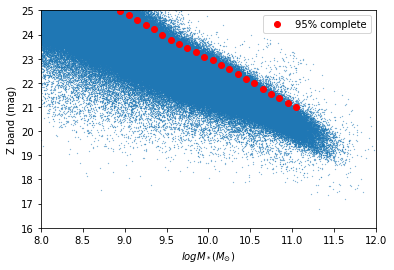

In [18]:
plt.scatter(logmass_5_7,mag_zband_5_7,s = 0.05)
# plt.plot(limit_bin,zband_cut[:-1],label = "95% complete")
plt.plot(limit_bin,zband_cut[:-1],"ro",label = "95% complete")
# plt.scatter(b,a,marker='*')
# plt.xscale("log")
plt.xlim(8,12)
plt.ylim(16,25)
plt.xlabel("$log M_*( M_{\odot})$")
plt.ylabel("Z band (mag)")
plt.legend()
# plt.grid()
# sns.set_style("ticks",{'axes.grid' : True})
# sns.set_style("darkgrid")

In [40]:
a = np.load('/home/kunxu/red_disk/mass_mag_limit.npy')
b = np.arange(8.8,11.3,0.1)

In [51]:
pwd

'/home/yunzheng/PAC/code/hsc_SEDfitting'